**STOCK MARKET PREDICTION USING NUMERICALL AND TEXTUAL ANALYSIS**


*   Objective:- create a hybrid model for stock price performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headline.
  
  
  I have use auto-arima model to make stock market price prediction using the historical stock prices data.In the sentiment analysis model.I have also use different machine
learning technique like RandomForestRegressor,LightGBM, and Xgboost to make the prediction



In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import nltk
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
import xgboost 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
url1='https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/DPQMQH/P2Z4PM'
Text=pd.read_csv(url1)
print("Data printed")
Text.head()

Data printed


,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [ ]:
Text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [ ]:
Text.shape

(3297172, 3)

In [ ]:
Text.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [ ]:
Text_cols =['Date','Category','headline']

In [ ]:
Text.columns=Text_cols

In [ ]:
Text.head()

,Date,Category,headline
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [ ]:
Text.tail()

,Date,Category,headline
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


In [ ]:
News=Text.drop('Category',axis=1)
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Date      int64 
 1   headline  object
dtypes: int64(1), object(1)
memory usage: 50.3+ MB


In [ ]:
News['Date']=pd.to_datetime(News['Date'],format='%Y%m%d')
News

,Date,headline
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa
...,...,...
3297167,2020-06-30,why tiktok removed 1 65 crore videos in india
3297168,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
3297169,2020-06-30,kangana ranaut gets a doll version of herself ...
3297170,2020-06-30,meezaan jaffrey reminisces his childhood days ...


In [ ]:
News['headline']=News.groupby(['Date']).transform(lambda x:''.join(x))
News=News.drop_duplicates()
News.reset_index(inplace=True,drop=True)
News

,Date,headline
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,Powerless north India gropes in the darkThink ...
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
...,...,...
7075,2020-06-26,Containment zone residents slam high prices ch...
7076,2020-06-27,like me i wont let you have a toxic relationsh...
7077,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
7078,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


In [ ]:
News['headline']

0       win over cena satisfying but defeating underta...
1       Status quo will not be disturbed at Ayodhya; s...
2       Powerless north India gropes in the darkThink ...
3       The string that pulled Stephen Hawking to Indi...
4       Light combat craft takes India into club class...
                              ...                        
7075    Containment zone residents slam high prices ch...
7076    like me i wont let you have a toxic relationsh...
7077    Atanu Ghosh plans to rewrite old scripts to ma...
7078    6 hot and stylish bikini looks of Katrina Kaif...
7079    Detective Byomkesh Bakshy!Edge of TomorrowFirs...
Name: headline, Length: 7080, dtype: object

In [ ]:
#cleaning headline
ps=PorterStemmer()
c=[]
for i in range (0,len(News['headline'])):
  df=re.sub('[^a-zA-Z]',' ',News['headline'][i])
  df=df.lower()
  df=df.split()
  df=' '.join(df)
  c.append(df)

In [ ]:
News['headline']=pd.Series(c)
News

,Date,headline
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,status quo will not be disturbed at ayodhya sa...
2,2001-01-03,powerless north india gropes in the darkthink ...
3,2001-01-04,the string that pulled stephen hawking to indi...
4,2001-01-05,light combat craft takes india into club class...
...,...,...
7075,2020-06-26,containment zone residents slam high prices ch...
7076,2020-06-27,like me i wont let you have a toxic relationsh...
7077,2020-06-28,atanu ghosh plans to rewrite old scripts to ma...
7078,2020-06-29,hot and stylish bikini looks of katrina kaifan...


In [ ]:
from textblob import TextBlob
def getSubjectivity (text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity (text):
  return TextBlob(text).sentiment.polarity

In [ ]:
News['Subjectivity']=News['headline'].apply(getSubjectivity)
News['Polarity']=News['headline'].apply(getPolarity)
News

,Date,headline,Subjectivity,Polarity
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333
1,2001-01-02,status quo will not be disturbed at ayodhya sa...,0.262963,0.104630
2,2001-01-03,powerless north india gropes in the darkthink ...,0.432500,0.107500
3,2001-01-04,the string that pulled stephen hawking to indi...,0.511540,0.127977
4,2001-01-05,light combat craft takes india into club class...,0.464036,0.255190
...,...,...,...,...
7075,2020-06-26,containment zone residents slam high prices ch...,0.370603,0.072293
7076,2020-06-27,like me i wont let you have a toxic relationsh...,0.380464,0.084433
7077,2020-06-28,atanu ghosh plans to rewrite old scripts to ma...,0.386141,0.074113
7078,2020-06-29,hot and stylish bikini looks of katrina kaifan...,0.380647,0.056804


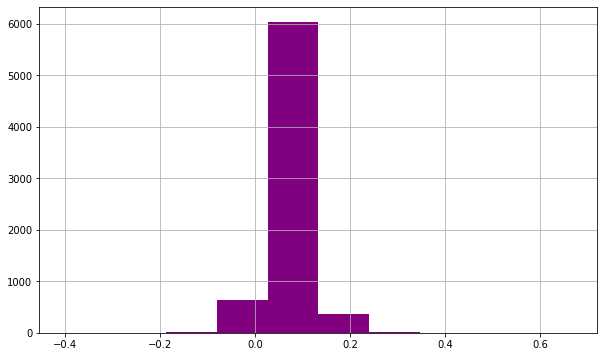

In [ ]:
plt.figure(figsize=(10,6))
News['Polarity'].hist(color='purple')

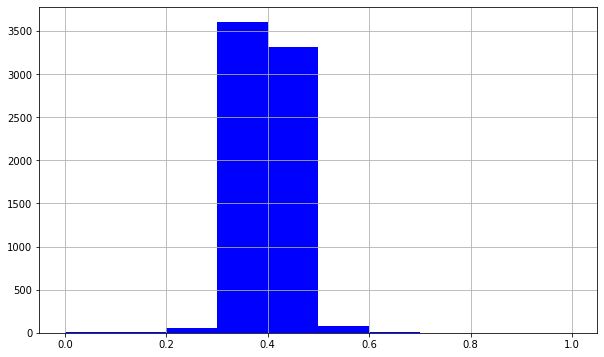

In [ ]:
plt.figure(figsize=(10,6))
News['Subjectivity'].hist(color='blue')

In [ ]:
#adding sentiment score to News
#sia=SentimentIntensityAnalyzer()

#News['Compound']= [sia.polarity_scores(v)['compound'] for v in News['headline']]
#News['Negative']= [sia.polarity_scores(v)['neg'] for v in News['headline']]
#News['Neutral']= [sia.polarity_scores(v)['neu'] for v in News['headline']]
#News['Positive']= [sia.polarity_scores(v)['pos'] for v in News['headline']]

In [ ]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()
News['Compound'] = [sia.polarity_scores(v)['compound'] for v in News['headline']]
News

,Date,headline,Subjectivity,Polarity,Compound
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333,-0.0000
1,2001-01-02,status quo will not be disturbed at ayodhya sa...,0.262963,0.104630,-0.9322
2,2001-01-03,powerless north india gropes in the darkthink ...,0.432500,0.107500,-0.5106
3,2001-01-04,the string that pulled stephen hawking to indi...,0.511540,0.127977,0.0717
4,2001-01-05,light combat craft takes india into club class...,0.464036,0.255190,0.9943
...,...,...,...,...,...
7075,2020-06-26,containment zone residents slam high prices ch...,0.370603,0.072293,-0.9999
7076,2020-06-27,like me i wont let you have a toxic relationsh...,0.380464,0.084433,-0.9999
7077,2020-06-28,atanu ghosh plans to rewrite old scripts to ma...,0.386141,0.074113,-0.9998
7078,2020-06-29,hot and stylish bikini looks of katrina kaifan...,0.380647,0.056804,-0.9997


In [ ]:
News['Negative'] = [sia.polarity_scores(v)['neg'] for v in News['headline']]
News

,Date,headline,Subjectivity,Polarity,Compound,Negative
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333,-0.0000,0.230
1,2001-01-02,status quo will not be disturbed at ayodhya sa...,0.262963,0.104630,-0.9322,0.104
2,2001-01-03,powerless north india gropes in the darkthink ...,0.432500,0.107500,-0.5106,0.115
3,2001-01-04,the string that pulled stephen hawking to indi...,0.511540,0.127977,0.0717,0.096
4,2001-01-05,light combat craft takes india into club class...,0.464036,0.255190,0.9943,0.111
...,...,...,...,...,...,...
7075,2020-06-26,containment zone residents slam high prices ch...,0.370603,0.072293,-0.9999,0.160
7076,2020-06-27,like me i wont let you have a toxic relationsh...,0.380464,0.084433,-0.9999,0.148
7077,2020-06-28,atanu ghosh plans to rewrite old scripts to ma...,0.386141,0.074113,-0.9998,0.133
7078,2020-06-29,hot and stylish bikini looks of katrina kaifan...,0.380647,0.056804,-0.9997,0.128


In [ ]:
News['Neutral'] = [sia.polarity_scores(v)['neu'] for v in News['headline']]
News

,Date,headline,Subjectivity,Polarity,Compound,Negative,Neutral
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333,-0.0000,0.230,0.473
1,2001-01-02,status quo will not be disturbed at ayodhya sa...,0.262963,0.104630,-0.9322,0.104,0.824
2,2001-01-03,powerless north india gropes in the darkthink ...,0.432500,0.107500,-0.5106,0.115,0.792
3,2001-01-04,the string that pulled stephen hawking to indi...,0.511540,0.127977,0.0717,0.096,0.816
4,2001-01-05,light combat craft takes india into club class...,0.464036,0.255190,0.9943,0.111,0.715
...,...,...,...,...,...,...,...
7075,2020-06-26,containment zone residents slam high prices ch...,0.370603,0.072293,-0.9999,0.160,0.752
7076,2020-06-27,like me i wont let you have a toxic relationsh...,0.380464,0.084433,-0.9999,0.148,0.759
7077,2020-06-28,atanu ghosh plans to rewrite old scripts to ma...,0.386141,0.074113,-0.9998,0.133,0.793
7078,2020-06-29,hot and stylish bikini looks of katrina kaifan...,0.380647,0.056804,-0.9997,0.128,0.787


In [ ]:
News['Positive'] = [sia.polarity_scores(v)['pos'] for v in News['headline']]
News

,Date,headline,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333,-0.0000,0.230,0.473,0.297
1,2001-01-02,status quo will not be disturbed at ayodhya sa...,0.262963,0.104630,-0.9322,0.104,0.824,0.072
2,2001-01-03,powerless north india gropes in the darkthink ...,0.432500,0.107500,-0.5106,0.115,0.792,0.093
3,2001-01-04,the string that pulled stephen hawking to indi...,0.511540,0.127977,0.0717,0.096,0.816,0.088
4,2001-01-05,light combat craft takes india into club class...,0.464036,0.255190,0.9943,0.111,0.715,0.173
...,...,...,...,...,...,...,...,...
7075,2020-06-26,containment zone residents slam high prices ch...,0.370603,0.072293,-0.9999,0.160,0.752,0.088
7076,2020-06-27,like me i wont let you have a toxic relationsh...,0.380464,0.084433,-0.9999,0.148,0.759,0.093
7077,2020-06-28,atanu ghosh plans to rewrite old scripts to ma...,0.386141,0.074113,-0.9998,0.133,0.793,0.074
7078,2020-06-29,hot and stylish bikini looks of katrina kaifan...,0.380647,0.056804,-0.9997,0.128,0.787,0.085


In [ ]:
df='/content/drive/MyDrive/data/^BSESN (2).csv'
Stock=pd.read_csv(df)
Stock.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-20,24325.769531,24325.769531,23839.759766,24062.039063,24062.039063,12800.0
1,2016-01-21,24194.750000,24351.830078,23862.000000,23962.210938,23962.210938,13200.0
2,2016-01-22,24122.060547,24472.880859,24120.039063,24435.660156,24435.660156,10100.0
3,2016-01-25,24540.970703,24650.570313,24433.669922,24485.949219,24485.949219,8900.0
4,2016-01-27,24643.130859,24645.699219,24458.130859,24492.390625,24492.390625,8500.0


In [ ]:
Stock.info()
Stock.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1234 non-null   object 
 1   Open       1229 non-null   float64
 2   High       1229 non-null   float64
 3   Low        1229 non-null   float64
 4   Close      1229 non-null   float64
 5   Adj Close  1229 non-null   float64
 6   Volume     1229 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.6+ KB


,Open,High,Low,Close,Adj Close,Volume
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1.229000e+03
mean,34069.394511,34228.963053,33830.549378,34026.018707,34026.018707,2.738539e+05
std,5386.175681,5396.878112,5349.223226,5377.354747,5377.354747,2.123738e+06
min,23060.390625,23142.960938,22494.609375,22951.830078,22951.830078,2.500000e+03
25%,29538.029297,29701.189453,29388.970703,29585.849609,29585.849609,1.070000e+04
50%,34493.691406,34666.328125,34279.781250,34433.070313,34433.070313,1.450000e+04
75%,38084.699219,38250.609375,37787.378906,38025.449219,38025.449219,2.010000e+04
max,49763.929688,49795.191406,49182.371094,49584.160156,49584.160156,3.181510e+07


In [ ]:
Stock.shape

(1234, 7)

In [ ]:
Stock.isnull().sum()

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

In [ ]:
Stock.Date=pd.to_datetime(Stock.Date)
Stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1234 non-null   datetime64[ns]
 1   Open       1229 non-null   float64       
 2   High       1229 non-null   float64       
 3   Low        1229 non-null   float64       
 4   Close      1229 non-null   float64       
 5   Adj Close  1229 non-null   float64       
 6   Volume     1229 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 67.6 KB


In [ ]:
Stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
Stock=Stock.set_index('Date')
Stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-20,24325.769531,24325.769531,23839.759766,24062.039063,24062.039063,12800.0
2016-01-21,24194.750000,24351.830078,23862.000000,23962.210938,23962.210938,13200.0
2016-01-22,24122.060547,24472.880859,24120.039063,24435.660156,24435.660156,10100.0
2016-01-25,24540.970703,24650.570313,24433.669922,24485.949219,24485.949219,8900.0
2016-01-27,24643.130859,24645.699219,24458.130859,24492.390625,24492.390625,8500.0
...,...,...,...,...,...,...
2021-01-13,49763.929688,49795.191406,49073.851563,49492.320313,49492.320313,27200.0
2021-01-14,49432.828125,49663.578125,49182.371094,49584.160156,49584.160156,24500.0
2021-01-15,49656.710938,49656.710938,48795.789063,49034.671875,49034.671875,14700.0


In [ ]:
Stock1=Stock.dropna(axis='rows')

In [ ]:
Stock1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-20,24325.769531,24325.769531,23839.759766,24062.039063,24062.039063,12800.0
2016-01-21,24194.750000,24351.830078,23862.000000,23962.210938,23962.210938,13200.0
2016-01-22,24122.060547,24472.880859,24120.039063,24435.660156,24435.660156,10100.0
2016-01-25,24540.970703,24650.570313,24433.669922,24485.949219,24485.949219,8900.0
2016-01-27,24643.130859,24645.699219,24458.130859,24492.390625,24492.390625,8500.0
...,...,...,...,...,...,...
2021-01-13,49763.929688,49795.191406,49073.851563,49492.320313,49492.320313,27200.0
2021-01-14,49432.828125,49663.578125,49182.371094,49584.160156,49584.160156,24500.0
2021-01-15,49656.710938,49656.710938,48795.789063,49034.671875,49034.671875,14700.0


In [ ]:
!pip install mplfinance
import mplfinance as mpf

     |████████████████████████████████| 61kB 4.4MB/s 


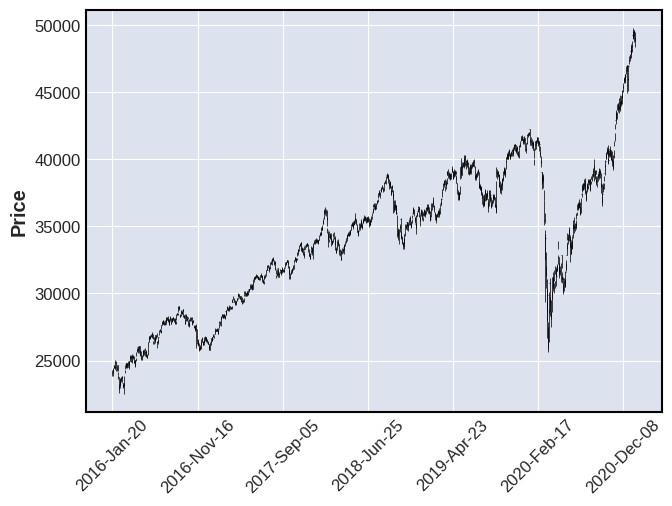

In [ ]:
mpf.plot(Stock1)

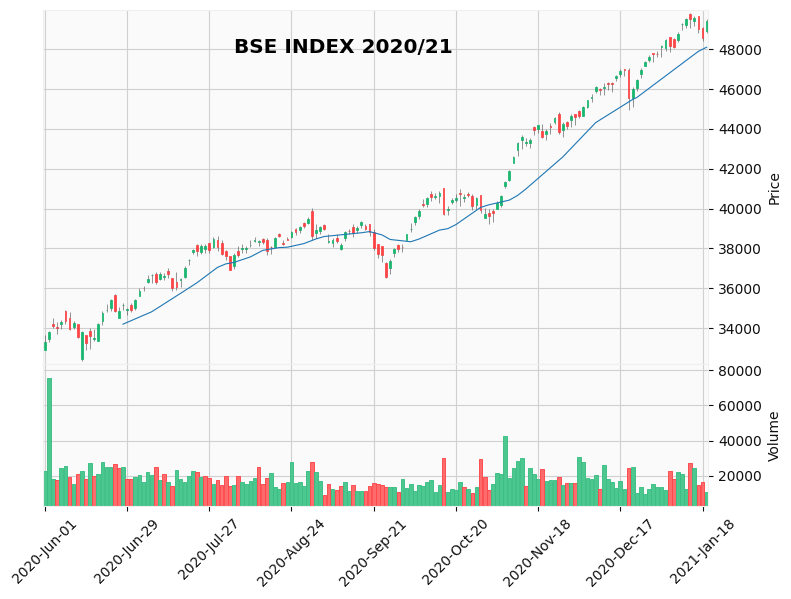

In [ ]:
mpf.plot(Stock1['2020-6':'2021-1'],figratio=(20,15),
type='candle',
title='BSE INDEX 2020/21',
mav=(20),volume=True,
tight_layout=True,
style='yahoo')

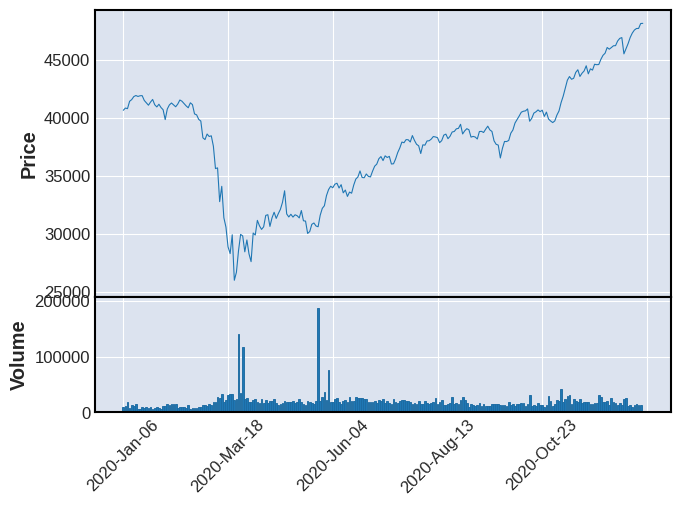

In [ ]:
mpf.plot(Stock1,type='line',volume=True)

In [ ]:
Stock2=Stock1[['Close']].copy()
Stock2

,Close
Date,
2016-01-20,24062.039063
2016-01-21,23962.210938
2016-01-22,24435.660156
2016-01-25,24485.949219
2016-01-27,24492.390625
...,...
2021-01-13,49492.320313
2021-01-14,49584.160156
2021-01-15,49034.671875


In [ ]:
#Check the price of Seires is Stationary
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
x=Stock2['Close'].values
result=adfuller(x)
print('ADF Statistic: %f' % result[0])
print('P-value: %f' % result[1])
#print('Critical Values:')
#for key, value in result[4].items():
#print("\t%s : %.3f",(key,value))  

#if result[0]<result[4]["5%"]:
 # print("Reject HO time series is Stationary")
#else
  #print("We Don't reject HO time series is non-Stationary")

ADF Statistic: -0.785737
P-value: 0.823276


In [ ]:
#Autocorrelation fuction and Partial Autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

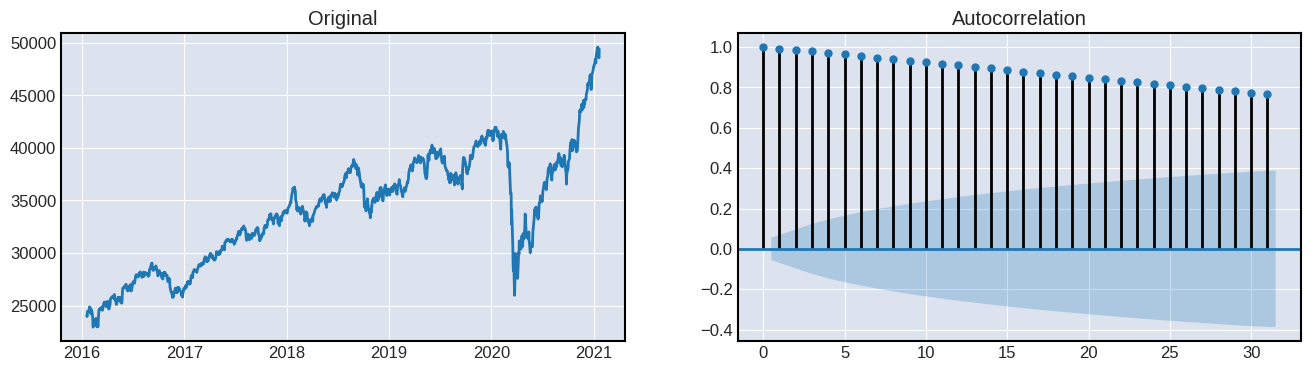

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(Stock2)
ax1.set_title("Original")
plot_acf(Stock2, ax=ax2);

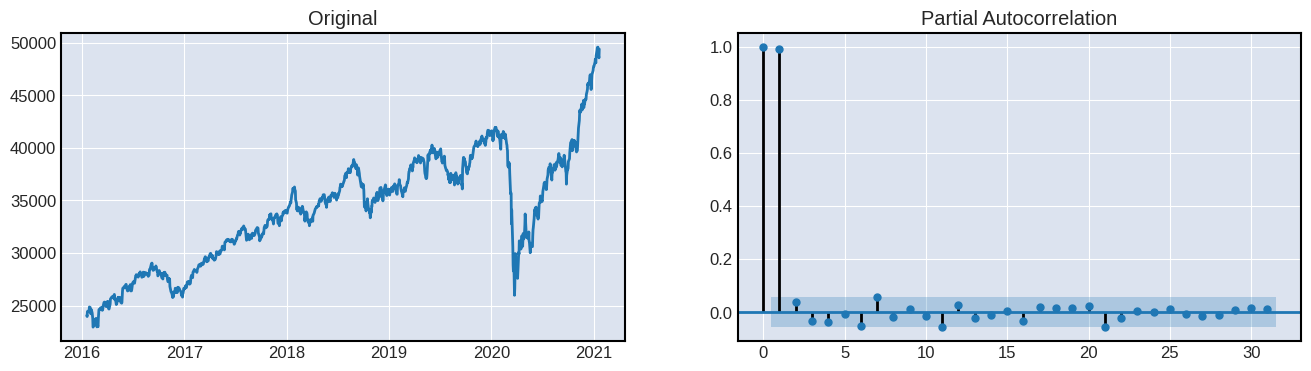

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(Stock2)
ax1.set_title("Original")
plot_pacf(Stock2, ax=ax2);

In [ ]:
!pip install pmdarima
from pmdarima.arima.utils import ndiffs

     |████████████████████████████████| 1.5MB 8.0MB/s 
     |████████████████████████████████| 9.5MB 39.8MB/s 
     |████████████████████████████████| 2.1MB 37.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
ndiffs(Stock2, test="adf")

1

In [ ]:
Stock2.shift(1)

,Close
Date,
2016-01-20,NaN
2016-01-21,24062.039063
2016-01-22,23962.210938
2016-01-25,24435.660156
2016-01-27,24485.949219
...,...
2021-01-13,49517.109375
2021-01-14,49492.320313
2021-01-15,49584.160156


In [ ]:
Stock2_diff=Stock2.diff(periods = 1)

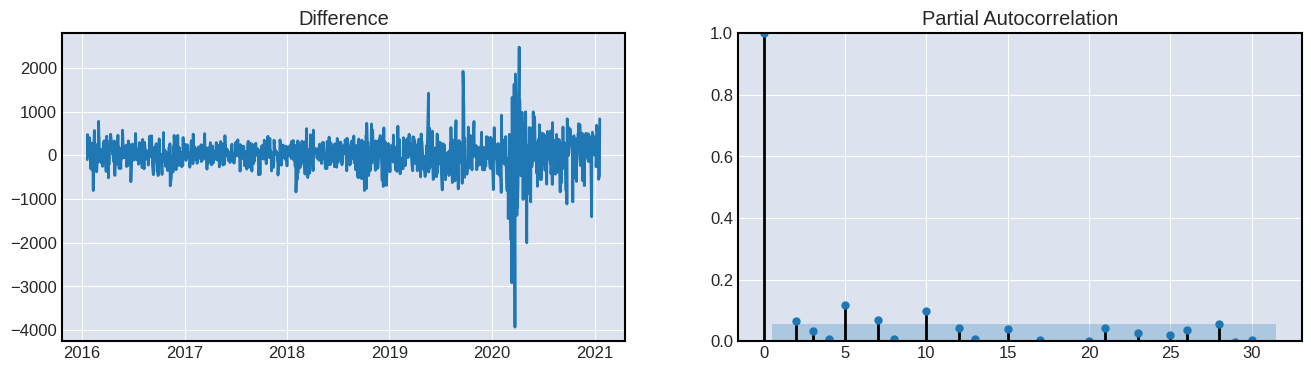

In [ ]:
diff=Stock2.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference")
ax2.set_ylim(0, 1)
# add 1 at the end of the fuction so that 
plot_pacf(diff, ax=ax2);

In [ ]:
#Fitting the arima model
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
#ARIMA model
model = ARIMA(Stock2_diff.dropna(), order = (1, 1, 2))
result = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  try:
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  try:


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1227
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -9035.487
Method:                       css-mle   S.D. of innovations            380.721
Date:                Wed, 20 Jan 2021   AIC                          18080.974
Time:                        04:24:53   BIC                          18106.536
Sample:                             1   HQIC                         18090.593
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0216      0.031      0.700      0.484      -0.039       0.082
ar.L1.D.Close    -0.9291      0.064    -14.429      0.000      -1.055      -0.803
ma.L1.D.Close    -0.0592      0.059     -1.011      0.312      -0.174       0.056
ma.L2.D.Close    -0.9408      0.059    -16.078      0.000      -1.055      -0.826
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0764           +0.0000j            1.0764            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0629           +0.0000j            1.0629            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [ ]:
fit = auto_arima(Stock2['Close'],trace=True,suppress_warnings=True)
fit.summary()                      

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18082.344, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18083.311, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18082.700, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18083.028, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18084.910, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18077.736, Time=1.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=18078.543, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18083.054, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18075.721, Time=1.28 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=18080.260, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18078.468, Time=1.06 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=18077.408, Time=1.20 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=18080.803, Time=0.48 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=18038.129, Time=2.76 sec
 ARIMA(3,1,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1229
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -9010.133
Date:                Wed, 20 Jan 2021   AIC                          18034.266
Time:                        04:25:49   BIC                          18070.058
Sample:                             0   HQIC                         18047.734
                               - 1229                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5996      0.051    -11.821      0.000      -0.699      -0.500
ar.L2          0.4355      0.066      6.572      0.000       0.306       0.565
ar.L3          0.8455      0.045     18.902      0.000       0.758       0.933
ma.L1          0.5790      0.057     10.161      0.000       0.467       0.691
ma.L2         -0.3469      0.077     -4.491      0.000      -0.498      -0.196
ma.L3         -0.8092      0.056    -14.461      0.000      -0.919      -0.699
sigma2      1.423e+05   2581.488     55.119      0.000    1.37e+05    1.47e+05
===================================================================================
Ljung-Box (Q):                       39.30   Jarque-Bera (JB):              8644.45
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               6.12   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
merge=pd.merge(Stock1,News,how = 'inner',on='Date')
merge

,Date,Open,High,Low,Close,Adj Close,Volume,headline,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2016-01-20,24325.769531,24325.769531,23839.759766,24062.039063,24062.039063,12800.0,everyday habits that could be ruining your ski...,0.357954,0.069113,-0.9999,0.156,0.745,0.100
1,2016-01-21,24194.750000,24351.830078,23862.000000,23962.210938,23962.210938,13200.0,ways alcohol is negatively affecting your diet...,0.429280,0.087366,-0.9999,0.151,0.743,0.106
2,2016-01-22,24122.060547,24472.880859,24120.039063,24435.660156,24435.660156,10100.0,foods you shouldn t eat daily must keep snacks...,0.400856,0.052290,-0.9999,0.146,0.760,0.095
3,2016-01-25,24540.970703,24650.570313,24433.669922,24485.949219,24485.949219,8900.0,the cholesterol myth ways to fight office leth...,0.414345,0.094777,-0.9994,0.137,0.751,0.112
4,2016-01-27,24643.130859,24645.699219,24458.130859,24492.390625,24492.390625,8500.0,quiz how well do you know your woman surprisin...,0.371413,0.092082,-0.9229,0.113,0.775,0.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,i never thought i had a voice until today vidy...,0.371566,0.093824,-0.9997,0.122,0.799,0.079
1085,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,truck firms look for new export markets to sel...,0.395069,0.028669,-0.9999,0.134,0.808,0.058
1086,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,containment zone residents slam high prices ch...,0.370603,0.072293,-0.9999,0.160,0.752,0.088
1087,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,hot and stylish bikini looks of katrina kaifan...,0.380647,0.056804,-0.9997,0.128,0.787,0.085


In [ ]:
df_merge=merge[['Close','Subjectivity','Polarity','Compound','Negative','Neutral','Positive']]
df_merge

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,24062.039063,0.357954,0.069113,-0.9999,0.156,0.745,0.100
1,23962.210938,0.429280,0.087366,-0.9999,0.151,0.743,0.106
2,24435.660156,0.400856,0.052290,-0.9999,0.146,0.760,0.095
3,24485.949219,0.414345,0.094777,-0.9994,0.137,0.751,0.112
4,24492.390625,0.371413,0.092082,-0.9229,0.113,0.775,0.112
...,...,...,...,...,...,...,...
1084,34868.980469,0.371566,0.093824,-0.9997,0.122,0.799,0.079
1085,34842.101563,0.395069,0.028669,-0.9999,0.134,0.808,0.058
1086,35171.269531,0.370603,0.072293,-0.9999,0.160,0.752,0.088
1087,34961.519531,0.380647,0.056804,-0.9997,0.128,0.787,0.085


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()


In [ ]:
new=pd.DataFrame(sc.fit_transform(df_merge))
new.columns=df_merge.columns
new.indexs=df_merge.index
new.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.058430,0.216369,0.576693,0.000050,0.616541,0.187500,0.560440
1,0.053176,0.753747,0.708993,0.000050,0.578947,0.173611,0.626374
2,0.078093,0.539597,0.454766,0.000050,0.541353,0.291667,0.505495
3,0.080740,0.641227,0.762708,0.000300,0.473684,0.229167,0.692308
4,0.081079,0.317773,0.743170,0.038563,0.293233,0.395833,0.692308


In [ ]:
x=new.drop('Close',axis=1)
y=new['Close']

In [ ]:
x.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.216369,0.576693,0.000050,0.616541,0.187500,0.560440
1,0.753747,0.708993,0.000050,0.578947,0.173611,0.626374
2,0.539597,0.454766,0.000050,0.541353,0.291667,0.505495
3,0.641227,0.762708,0.000300,0.473684,0.229167,0.692308
4,0.317773,0.743170,0.038563,0.293233,0.395833,0.692308


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape

(871, 6)

In [ ]:
x_train[:5]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1088,0.350408,0.584827,0.00005,0.406015,0.618056,0.175824
717,0.436781,0.600707,0.00040,0.323308,0.451389,0.560440
688,0.411252,0.524428,0.00005,0.473684,0.423611,0.384615
308,0.097843,0.646697,0.00025,0.488722,0.180556,0.747253
251,0.635399,0.686096,0.99955,0.210526,0.430556,0.758242


In [ ]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
random=RandomForestRegressor()
random.fit(x_train,y_train)
prediction=random.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print(prediction[:5])
print(y_test[:5])
print(mean_squared_error(prediction,y_test))

[0.49749162 0.5719561  0.53683856 0.2217971  0.52312565]
809    0.780878
597    0.662893
278    0.313150
533    0.524783
482    0.571578
Name: Close, dtype: float64
0.06882102924411523


In [ ]:
Boost=AdaBoostRegressor()
Boost.fit(x_train,y_train)
pd=Boost.predict(x_test)

In [ ]:
print(mean_squared_error(pd,y_test))

0.067929532797038


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec=DecisionTreeRegressor()
dec.fit(x_train,y_train)
pdc=dec.predict(x_test)

In [ ]:
print(pdc[:5])
print(y_test[:5])
print(mean_squared_error(pdc,y_test))

[0.60096147 0.80475451 0.68571325 0.06691773 0.7976002 ]
809    0.780878
597    0.662893
278    0.313150
533    0.524783
482    0.571578
Name: Close, dtype: float64
0.11203506775815053


In [ ]:
import lightgbm
lgb=lightgbm.LGBMRegressor()
lgb.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
pred=lgb.predict(x_test)
print(mean_squared_error(pred,y_test))

0.0705961476289113


In [ ]:
xgb=xgboost.XGBRegressor()
xgb.fit(x_train,y_train)

[04:44:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
preds=xgb.predict(x_test)
print(mean_squared_error(preds,y_test))

0.06598878077334851


We observed that Xgboost model performs the best for the sentiment analysis.